In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [3]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15) # using a size in points
import pygtc


In [4]:
plabels = ["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"]

priors = [[9.5,11.5], [-1,7], [0,5], [-2,2], [-3,2], [-2,2]]

fixed = [False, True, True, False, True, False]

### first the alpha permutations

In [5]:
beta1 = jsm_mcmc.Chain("../../mcmc/Feature_Recovery/beta_permutations/mock_1/chain.h5", fixed=fixed, Nstack=500, Nburn=200, Nthin=15)

beta2 = jsm_mcmc.Chain("../../mcmc/Feature_Recovery/beta_permutations/mock_2/chain.h5", fixed=fixed, Nstack=500, Nburn=200, Nthin=15)

beta3 = jsm_mcmc.Chain("../../mcmc/Feature_Recovery/beta_permutations/mock_3/chain.h5", fixed=fixed, Nstack=500, Nburn=200, Nthin=15)

beta4 = jsm_mcmc.Chain("../../mcmc/Feature_Recovery/beta_permutations/mock_4/chain.h5", fixed=fixed, Nstack=500, Nburn=200, Nthin=15)

In [6]:
# save_file = "../../../paper_1/figures/alpha_perm.pdf"

In [7]:
colors = ['mediumpurple', 'grey', 'cornflowerblue', 'orange']

#colorsOrder=['purples', 'grays', 'blues', 'oranges'],


In [8]:

chain_labels = ["$\\alpha = $" + beta4.constraints[0] + "\n $\\sigma = $" + beta4.constraints[1] + "\n $\\beta = $" + beta4.constraints[2],
                "$\\alpha = $" + beta3.constraints[0] + "\n $\\sigma = $" + beta3.constraints[1] + "\n $\\beta = $" + beta3.constraints[2],
                "$\\alpha = $" + beta2.constraints[0] + "\n $\\sigma = $" + beta2.constraints[1] + "\n $\\beta = $" + beta2.constraints[2],
                "$\\alpha = $" + beta1.constraints[0] + "\n $\\sigma = $" + beta1.constraints[1] + "\n $\\beta = $" + beta1.constraints[2]]

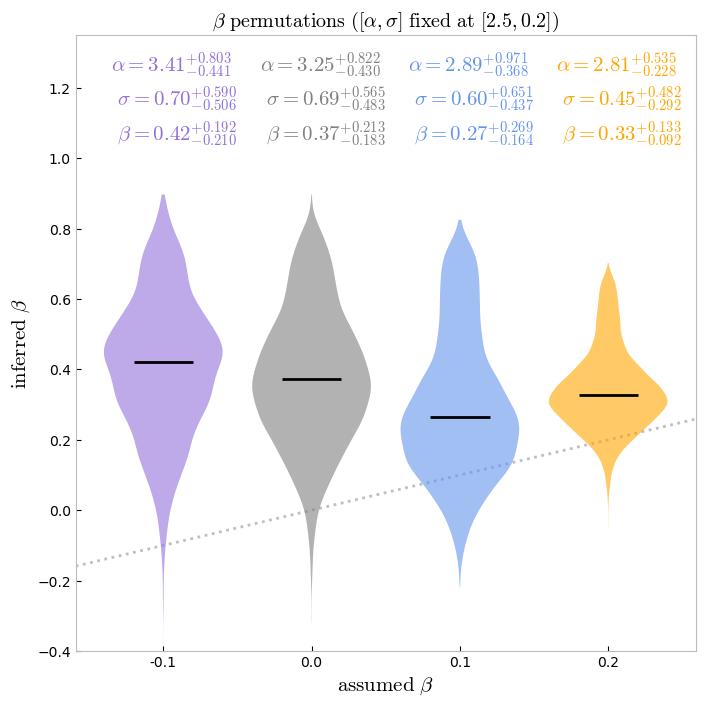

In [9]:
beta_permutations = [-0.1, 0.0, 0.1, 0.2]

data = [beta4.clean[:,2], beta3.clean[:,2],  beta2.clean[:,2], beta1.clean[:,2]]

# Create a violin plot
plt.figure(figsize=(8, 8))
plt.title("$\\beta\ \mathrm{permutations}\ ([\\alpha, \\sigma]\ \mathrm{fixed\ at}\ [2.5, 0.2])$", color="black")
violins = plt.violinplot(data, showmeans=False, showmedians=True, positions=beta_permutations, widths=0.08, showextrema=False)

for i, violin in enumerate(violins['bodies']):
        violin.set_facecolor(colors[i])
        #violin.set_edgecolor(colors[i])
        violin.set_alpha(0.6)

violins['cmedians'].set_color("black")

plt.xticks(beta_permutations, ["-0.1", "0.0", "0.1", "0.2"])
plt.ylabel('$\mathrm{inferred}\ \\beta$', fontsize=15)
plt.xlabel("$\mathrm{assumed}\ \\beta$", fontsize=15)

yloc = [2.4, 3.3, 4.2, 6]
xloc = [1.85, 2.35, 2.83, 3.32]
for i, label in enumerate(chain_labels):
        plt.text(beta_permutations[i]-0.035, 1.05, label, color=colors[i], fontsize=15)


xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle=':', color='grey', scalex=False, scaley=False, zorder=0, alpha=0.5)

#plt.grid()
plt.ylim(-0.4, 1.35)
plt.savefig("../../../paper_1/figures/feature_recovery/beta_violin.pdf", bbox_inches='tight')

plt.show()


In [10]:
hmm = np.array([[2.5, 0.2, 0.2], [2.5, 0.2, 0.1], [2.5, 0.2, 0.0], [2.5, 0.2, -0.1]])

data = [beta1.clean, beta2.clean, beta3.clean, beta4.clean]

colors = ['orange', 'cornflowerblue', 'grey', 'mediumpurple']

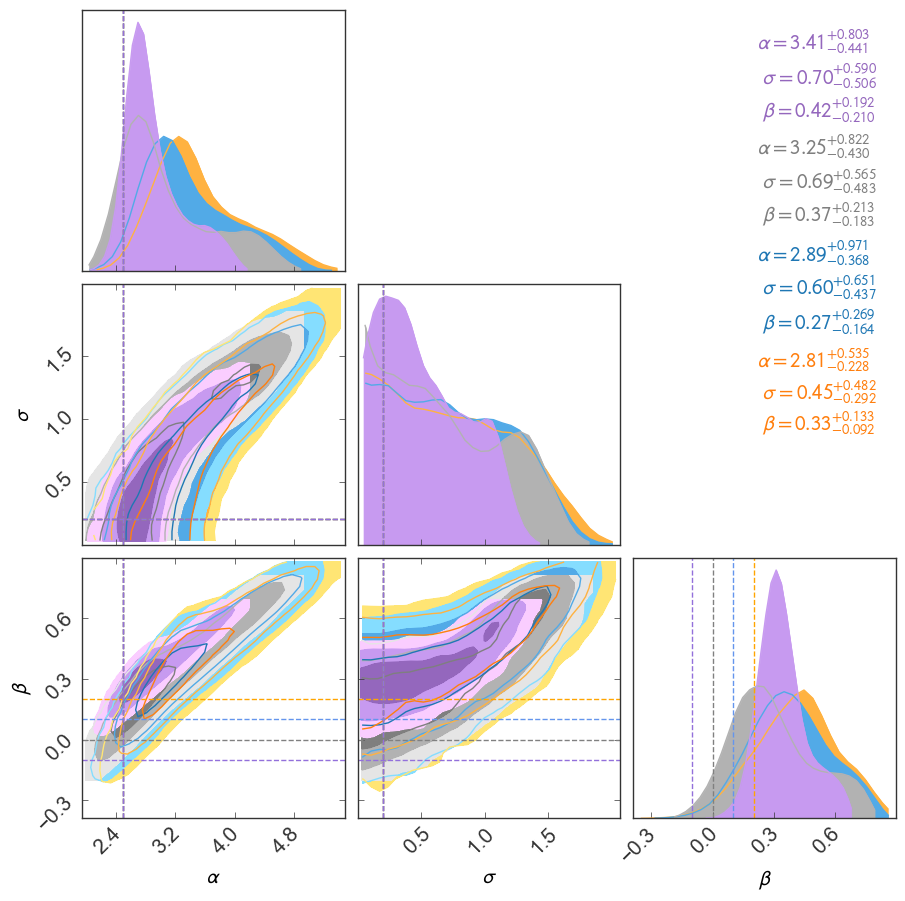

In [11]:
test = jsm_mcmc.MulitChain(data, chain_labels, fixed)
test.plot_posteriors(truths=hmm, truthColors=colors, truthLineStyles=["--"]*6, filledPlots=True, nContourLevels=3, colorsOrder=['purples', 'grays', 'blues', 'oranges'], plotName="../../../paper_1/figures/appendix/beta_corner.pdf")

In [12]:
L2_test = jsm_mcmc.Chain("../../mcmc/Feature_Recovery/beta_permutations/mock_5/chain.h5", fixed=fixed, Nstack=500, Nburn=150, Nthin=15)
alpha = jsm_mcmc.Chain("../../mcmc/Feature_Recovery/alpha_permutations/mock_2/chain.h5", fixed=fixed, Nstack=500, Nburn=150, Nthin=15)

In [13]:
data = [alpha.clean, beta3.clean, L2_test.clean]

truth = [2.5, 0.2, 0.0]

chain_labels = ["L1 library (slope): \n $\\alpha = $" + alpha.constraints[0] + "\n $\\sigma = $" + alpha.constraints[1] + "\n $\\beta = $" + alpha.constraints[2],
                "L1 library (curvature): \n $\\alpha = $" + beta3.constraints[0] + "\n $\\sigma = $" + beta3.constraints[1] + "\n $\\beta = $" + beta3.constraints[2],
                "L2 library (curvature): \n $\\alpha = $" + L2_test.constraints[0] + "\n $\\sigma = $" + L2_test.constraints[1] + "\n $\\beta = $" + L2_test.constraints[2]]

title = "$\mathrm{DOF\ comparison}: ([\\alpha, \\sigma, \\beta]\ \mathrm{fixed\ at}\ [2.5, 0.2, 0.0])$"

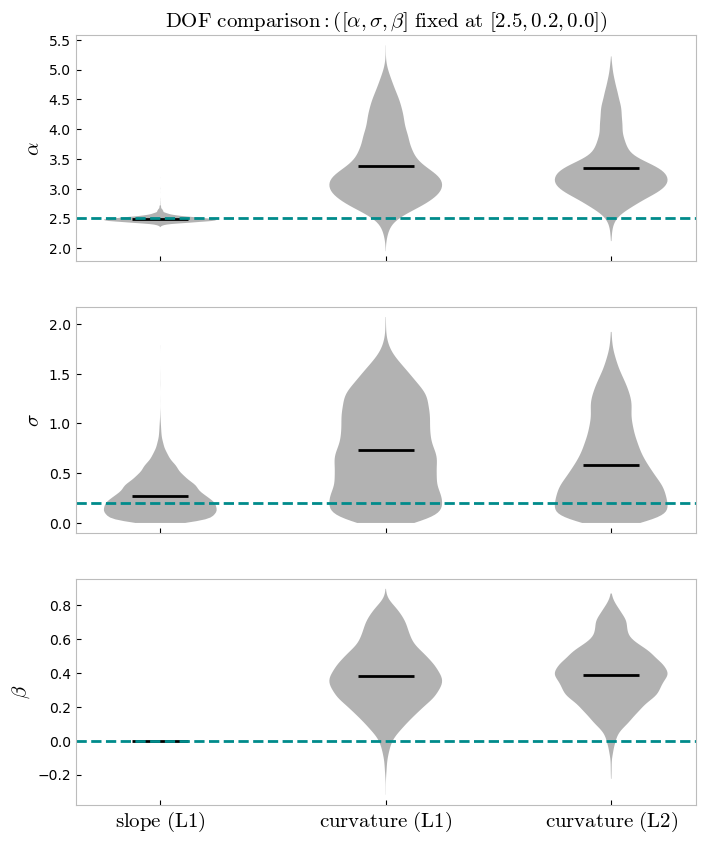

In [14]:
test = jsm_mcmc.MulitChain(np.array(data), chain_labels, fixed)
test.violin(truths=truth, model_labels=["$\mathrm{slope\ (L1)}$", "$\mathrm{curvature\ (L1)}$", "$\mathrm{curvature\ (L2)}$"], title=title, save_file="../../../paper_1/figures/feature_recovery/viloin_mash.pdf")